# 1. Probability theory

## Probability theory: Basic concepts

In the first part of the probability theory, we will go through the basics definitions.

**Event** — is a set of outcomes of an experiment to which a probability is assigned. For example, when we tossing the coin there are two possible outcomes — observe and reverse. Thus we have two possible events, while tossing a coin:

$$event \, set : \{head, tail\}$$

**Probability** — is a measure of a likelihood that event will occur — a number from 0 to 1. 
$$P(A)=\frac{m}{n} \qquad 0 \leq P(A) \leq 1 $$

**Collectively exhaustive events** — a set of events where at least one of the event will occur. 

**Mutually exclusive events** — are events that cannot both occur. 

**Equally likely events** — are events that have the same probability to occur. 

In [1]:
def probability(outcomes):
    return 1/len(outcomes)

probability([0, 1])

0.5

In [2]:
def sum_of_probabilities(*events):
    return sum(events)

sum_of_probabilities(0.1, 0.2, 0.3)

0.6000000000000001

## Probability theory: The Law Of Total Probability
Let it be required to determine the probability of the event A, which can occur with one of the events $H_1, H_2 ,…, H_n$ forming a complete group of mutually exclusive events. This is **The Law Of Total Probability**:
$$P(A)= \sum _{i=1}^{n} P(H_i)P(A|H_i)$$

**Problem 1** 

Let’s imagine that we want to calculate the probability of some event A1 in the given figure.
![Exercise 1](picture/EG1.png)


In [6]:
def probability_of_event(nodes, name):
    probability = 0
    
    def node_probability(node, name):
        if node.name == name:
            return [node.probability]

        if len(node.childrens) == 0:
            return []
        
        probabilities = []
        for children in node.childrens:
            for probability in node_probability(children, name):
                probabilities.append(node.probability * probability)
        
        return probabilities
    
    for node in nodes:
        probability += sum(node_probability(node, name))

    return probability

class Node:
    def __init__(self, name, probability, childrens=[]):
        self.name = name
        self.probability = probability
        self.childrens = childrens

a1_h1 = Node('A1', 0.5)
a2_h1 = Node('A2', 0.5)
h1 = Node('H1', 0.3, [ a1_h1, a2_h1 ])

a1_h2 = Node('A1', 0.7)
a2_h2 = Node('A2', 0.3)
h2 = Node('H2', 0.5, [ a1_h2, a2_h2 ])

a1_h3 = Node('A1', 1)
a2_h3 = Node('A2', 0)
h3 = Node('H2', 0.2, [ a1_h3, a2_h3 ])

a1_probability = probability_of_event([ h1, h2, h3 ], 'A1')
a1_probability


0.7

## Probability theory: Bayes’ theorem

\begin{equation}
\label{eq:bayes}
P(\textbf{A}|\textbf{B}) = P(\textbf{A} ) \frac{P(\textbf{B} |\textbf{A})}{P(\textbf{B})} 
\end{equation}

Where $A$ and $B$ are events.

$P(A|B)$ —the likelihood of event $A$ occurring after $B$ is tested

$P(B|A)$ — the likelihood of event $B$ occurring after $A$ is tested

$P(A)$ and $P(B)$ — probabilities of events $A$ and $B$

**Problem 2**

Let’s imagine that person X comes back from an Denmark and want to check, does he have this country rare disease. He took a test and got 0.9 that he has a disease, given that test has 0.99 probability of giving the right result. Also, this disease is very unlikely to occur, since only 0.0001 people returning from the country have the disease.


In [8]:
def bayes_probability(p_b_a, p_a, p_b):
    return p_b_a * p_a / p_b

first_probability = bayes_probability(0.9, 0.0001, 0.1)
first_probability

0.0009

In [9]:
second_probability = bayes_probability(0.9, 0.0009, 0.1)
second_probability 

0.0081

## Probability theory: Distribution of a random variable
**Random variable** — is a variable whose possible values are outcomes of random experiment.
The **law of distribution of a random variable** is any relation that establishes a connection between the possible values of a random variable and the corresponding probabilities.

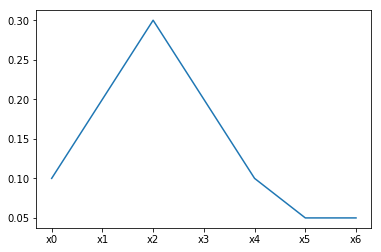

In [40]:
import random
discrete_variable = random.choice(['head', 'tail'])
continuous_variable = random.random()

from matplotlib.pyplot import plot

distribution_low = [0.1, 0.2, 0.3, 0.2, 0.1, 0.05, 0.05]

plot(['x' + str(i) for i, _ in enumerate(distribution_low)], distribution_low)


## Probability theory: Probability Distribution Function (PDFs)
The distribution function of any discrete random variable is always a discontinuous step function, the jumps of which occur at points corresponding to possible random values of the quantity, and are equal to the probabilities of these values. The sum of all the jumps of the function $F(X)=P(X<x)$ is equal to one. As the number of possible values of the random variable increases and the intervals between them decreases, the jumps become larger, and the jumps themselves become smaller, the stepped curve becomes smoother, the random variable gradually approaches a continuous value, and its distribution function — to a continuous function. The most important points you need to understand about distribution function is that it is always a monotonically increasing function and the maximum value of this function equal to one.


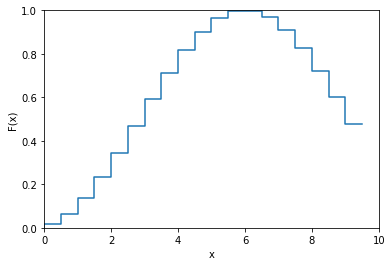

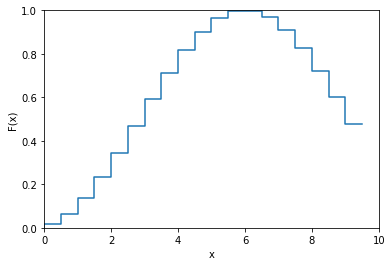

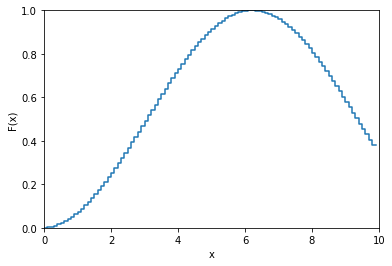

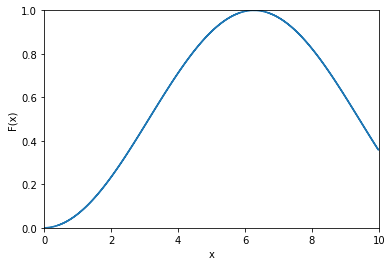

In [11]:
import numpy as np
from numpy import ma
import matplotlib.pyplot as plot
from matplotlib import animation

def plot_distribution_fuction(coefficient):
    x = np.arange(0, 10, coefficient)
    y = np.sin(0.5*x + 11) * 0.5 + 0.5

    plot.step(x, y)
    plot.xlim(0, 10)
    plot.ylim(0, 1)
    plot.xlabel('x')
    plot.ylabel('F(x)')
    plot.show()

plot_distribution_fuction(0.5)
plot_distribution_fuction(0.5)
plot_distribution_fuction(0.1)
plot_distribution_fuction(0.01)

## Probability theory: Probability density function

Probability density function is derivative of distribution function, which characterizes the density with which the values of the random variable are distributed at a given point. [probability density function (PDF](https://en.wikipedia.org/wiki/Probability_density_function)

probability to fall between 1 and 2 : 0.1553435655307577


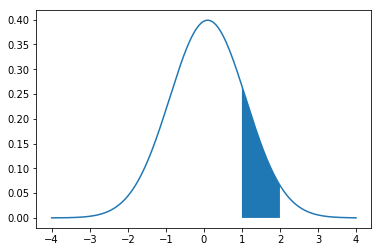

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

distribution_function = lambda x: norm.pdf(x, 0.1)
x1 = 1
x2 = 2

print('probability to fall between {0} and {1} :'.format(x1, x2), integrate.quad(distribution_function, x1, x2)[0])
step = 0.001
whole_x = np.arange(-4, 4, step)
whole_y = list(map(distribution_function, whole_x))

needed_x = np.arange(x1, x2, step)
needed_y = list(map(distribution_function, needed_x))
plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y)

## Probability theory: Expected value, Mode, Median, Moments, Variance and  Standard deviation

One of the most important characteristics is **expected value** — the sum of the products of all possible values of a random variable by the probabilities of these values.

**Mode**- for a discrete random variable mode is the most probable value, and for continuous is a value where probability density is the biggest.

Generating moments usually involves integrals that are extremely difficult to compute. Moment generating functions make this much, much easier. The moment generating function is defined as,
$$
M(t) = \mathbb{E}(\exp(t X))
$$

The first moment is the mean, which we can easily compute from 
$M(t)$ as,
$$
\begin{align*}
\frac{dM(t)}{dt} &= \frac{d}{dt}\mathbb{E}(\exp(t X)) = \mathbb{E}\frac{d}{dt}(\exp(t X))\\\
                 &= \mathbb{E}(X \exp(t X))  \\\
\end{align*}
$$

Now, we have to set $t=0$ and we have the mean,

$$
M^{(1)}(0) = \mathbb{E}(X)
$$

continuing this derivative process again, we obtain the second moment as,

$$
\begin{align*}
M^{(2)}(t) &= \mathbb{E}(X^2\exp(t X)) \\\
M^{(2)}(0) &= \mathbb{E}(X^2)
\end{align*}
$$



mode:  0.3


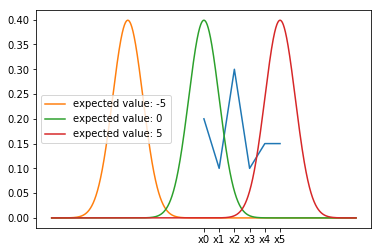

In [14]:
def expected_value(values, probabilities):
    return sum([v * p for v, p in zip(values, probabilities)])

expected_value([1, 2, 3], [0.2, 0.3, 0.5])

from matplotlib.pyplot import plot

def mode_for_discrete(probabilities):
    return max(probabilities)

probabilities = [0.2, 0.1, 0.3, 0.1, 0.15, 0.15]
print('mode: ', mode_for_discrete(probabilities))
plot(['x' + str(i) for i, _ in enumerate(probabilities)], probabilities)

## how distribution function will change according to the expected value.
sigma = 1
xs = np.arange(-10, 10, 0.01)

for e_v in [-5, 0, 5]:
    plt.plot(
        xs,
        norm.pdf(xs, e_v, sigma),
        label='expected value: {0}'.format(e_v)
    )
plt.legend()
plt.show()

In [16]:
from math import sqrt

def expected_value(values, probabilities):
    return sum([v * p for v, p in zip(values, probabilities)])

def standard_deviation(values, probabilities):
    m = expected_value(values, probabilities)
    return sqrt(sum([(v - m)**2 * p for v, p in zip(values, probabilities)]))

values = [1, 2, 5, 3, 8, 4]
probabilities = [.1, .2, .4, .1, .15, .05]

standard_deviation(values, probabilities)

2.1354156504062622

For a visual characteristic of dispersion it is more convenient to use a quantity whose dimension coincides with the dimension of the random variable. To do this, a square root is extracted from the dispersion. The value obtained is called the standard deviation. In practice, you will see **standard deviation** more often then variance.

Expected value, variance and standard deviation — the most commonly used characteristics of a random variable. They characterize the most important features of the distribution: its position and degree of dispersion. For a more detailed description of the distribution, higher order moments are used.

# Probability theory: Normal distribution, Exponential Distribution

## Normal Distribution (Gaussian Distribution)

- unimodal and symmetric
- many algorithms in machine learning & statistics have normality assumptions
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)
- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$

- standard normal distribution with zero mean and unit variance, $N(0, 1)$:



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

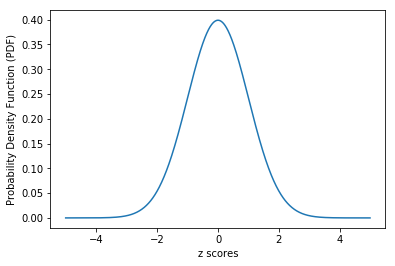

In [23]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

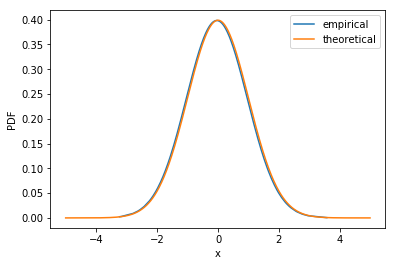

In [24]:
sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

def empirical_pdf(sample):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    sample_sorted = np.sort(sample)
    sample_pdf = univariate_gaussian_pdf(sample_sorted, 
                                     sample_mean, 
                                     sample_variance)
    return sample_sorted, sample_pdf

sample_sorted, sample_pdf = empirical_pdf(sample)
plt.plot(sample_sorted, sample_pdf, label='empirical')
plt.plot(x, y, label='theoretical')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend()
plt.show()

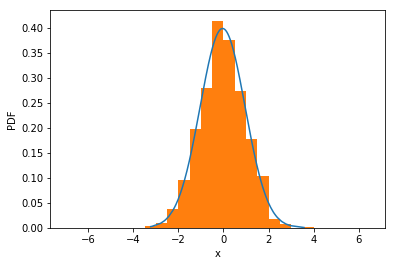

In [25]:
plt.plot(sample_sorted, sample_pdf)
plt.hist(sample_sorted, normed=True, 
         bins=np.arange(-7, 7, 0.5))
plt.ylabel('PDF')
plt.xlabel('x')
plt.show()

### Cumulative Distribution Function (CDF)

- CDF of the normal distribution:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$


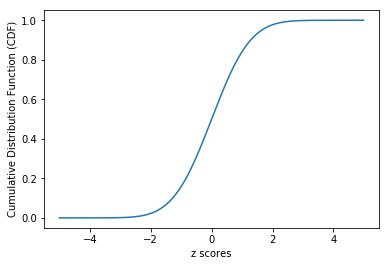

In [26]:
from scipy.integrate import quad


def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))


def gaussian_cdf(x, mean, variance):

    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, 
                      -np.inf, 
                      val, 
                      args=(mean, variance))[0])
        out.append(integ)
    return out

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = gaussian_cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

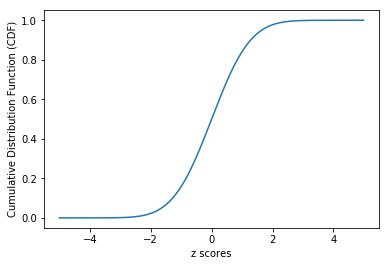

In [27]:
y = stats.norm.cdf(x)

plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

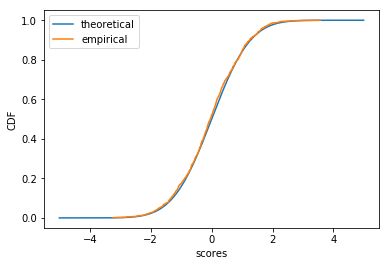

In [28]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y


sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

sample_sorted, sample_cdf = empirical_cdf(sample)
plt.plot(x, y, label='theoretical')
plt.plot(sample_sorted, sample_cdf, label='empirical')
plt.ylabel('CDF')
plt.xlabel('scores')
plt.legend()
plt.show()

## Exponential Distribution

- has only 1 parameter, the rate parameter $\lambda$ (the "mean waiting time," $\lambda > 0$)
- describes the time between events in a Poisson process 
- note that the Poisson distribution can be derived from both the binomial and the exponential distribution
- the exponential pdf is used to model waiting times between any two events from a poisson process; the exponential distribution is continuous
- the poisson pdf models the probability of *k* hits in a given time interval; the poisson distribution is discrete

$$f(x; \lambda) = \begin{cases} 
      e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

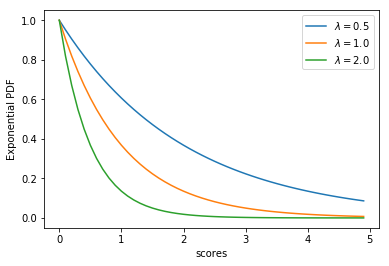

In [29]:
def univariate_exponential_pdf(x, lambda_):
    return np.where(x >= 0, np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_pdf(x, lambda_=.5)
y_1 = univariate_exponential_pdf(x, lambda_=1.)
y_2 = univariate_exponential_pdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential PDF')
plt.legend(loc = 'upper right')
plt.show()

Text(0,0.5,'Exponential PDF')

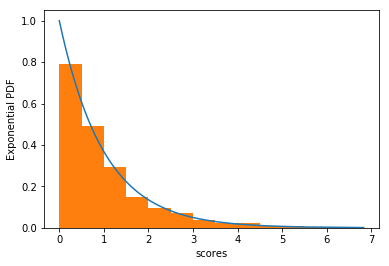

In [30]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.pdf(x_sample)

plt.plot(x_sample, y_sample)
plt.hist(x_sample, normed=True, bins=np.arange(0, 7, 0.5))
plt.xlabel('scores')
plt.ylabel('Exponential PDF')

### Cumulative Distributiion Function of the Exponential Distribution

$$F(x; \lambda) = \begin{cases} 
      1 - e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

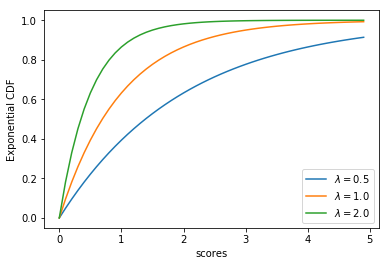

In [31]:
def univariate_exponential_cdf(x, lambda_):
    return np.where(x >= 0, 1 - np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_cdf(x, lambda_=.5)
y_1 = univariate_exponential_cdf(x, lambda_=1.)
y_2 = univariate_exponential_cdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.legend(loc = 'lower right')
plt.show()

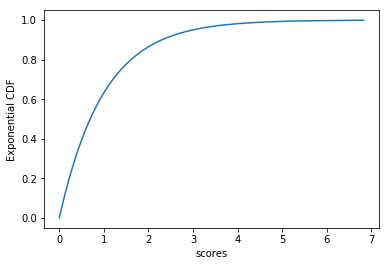

In [32]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.cdf(x_sample)

plt.plot(x_sample, y_sample)
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.show()

## Poisson Distribution
- we have $np \rightarrow \lambda$, assuming that we have infinite events ($n \rightarrow \infty)$ so that the probability of a singular event is infinitely small ($p \rightarrow 0$)
- $\mathcal{Bin}(n, p) \approx \mathcal{Poisson}(np), \text{ for } n \rightarrow  \infty$
- in that sense, the poisson distribution approximates the binomial distribution for a rare number of events that happen in a large number of trials

$$P(k \text{ events in an interval}) = e^{-\lambda} \frac{\lambda^k}{k!}$$

where $\lambda$ is the average number of events per interval
- poisson distributions are used to model rare events with large *n* and small *p* (binomial distributions are also appropriate but poisson is easier to compute)

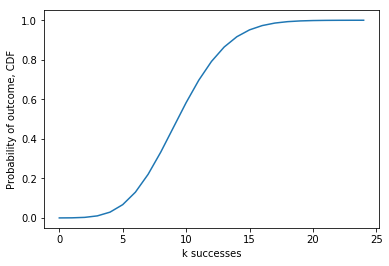

In [36]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

p = 0.1
n = 100
lambda_ = n*p

probas = []
for k in range(25):
    probas.append(np.e**(-lambda_)*lambda_**k/factorial(k))
    

plt.plot(range(25), np.cumsum(probas))
plt.xlabel('k successes')
plt.ylabel('Probability of outcome, CDF')
plt.show()



# Statistics

## Statistics: Central limit theorem

Before we move to real data, lets get into important concept Central Limit Theorem (CLT): It is a statistical theory states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. 

The Central Limit Theorem is exactly what the shape of the distribution of means will be when we draw repeated samples from a given population. Specifically, as the sample sizes get larger, the distribution of means calculated from repeated sampling will approach normality.

The central limit theorem states that when an infinite number of successive random samples are taken from a population, the sampling distribution of the means of those samples will become approximately normally distributed with mean μ and standard deviation σ/√ N as the sample size (N) becomes larger, irrespective of the shape of the population distribution.

logarithmic distribution


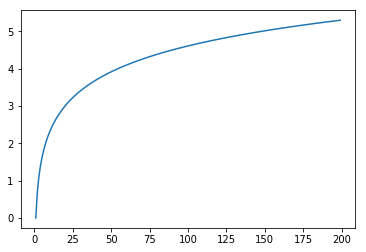

sample number =  2


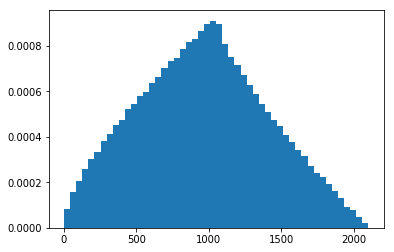

sample number =  4


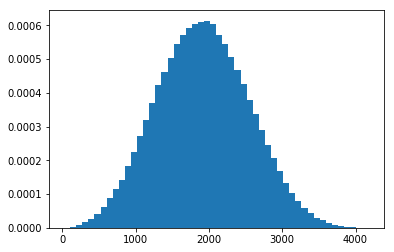

sample number =  10


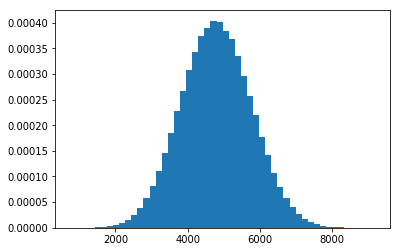

sample number =  50


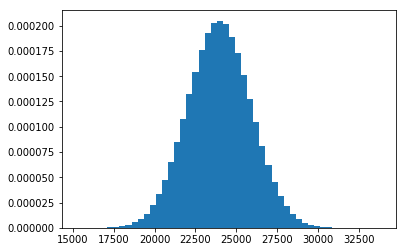

sample number =  100


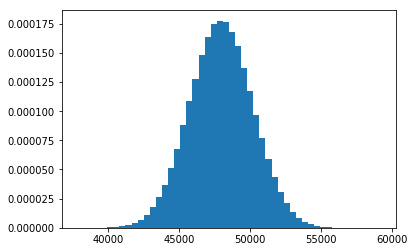

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import sample

xs = range(200)[1:]
ys = [np.log(x) for x in xs]

def mean(xs, ys):
    return sum([v * p for v, p in zip(xs, ys)])

print('logarithmic distribution')
plt.plot(xs, ys)
plt.show()

for sample_number in [2, 4, 10,50, 100]:
    s_xs = [sample(xs, sample_number) for i in range(1000000)]
    means = []
    for s_x in s_xs:
        means.append(mean(s_x, [ys[x - 1] for x in s_x]))
    print('sample number = ', sample_number)
    plt.hist(means, 50, density=True)
    plt.show()

uniform distribution


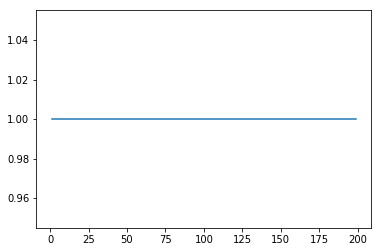

sample number =  2


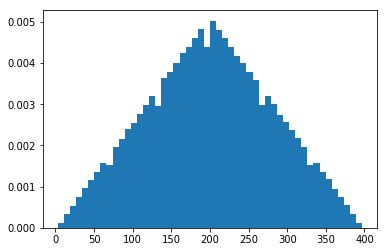

sample number =  4


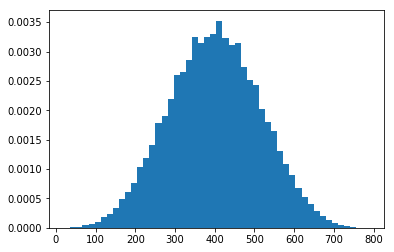

sample number =  10


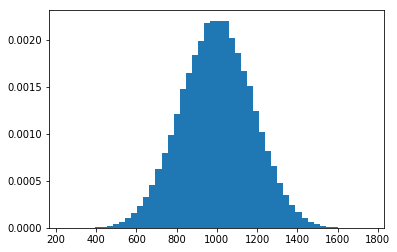

In [38]:
## let’s also try uniform distribution.
xs = range(200)[1:]
ys = [1 for x in xs]

def mean(xs, ys):
    return sum([v * p for v, p in zip(xs, ys)])

print('uniform distribution')
plt.plot(xs, ys)
plt.show()

for sample_number in [2, 4, 10]:
    s_xs = [sample(xs, sample_number) for i in range(1000000)]
    means = []
    for s_x in s_xs:
        means.append(mean(s_x, [ys[x - 1] for x in s_x]))
    print('sample number = ', sample_number)
    plt.hist(means, 50, density=True)
    plt.show()

As you can see no matter what the distribution population has when we take a large sample of the population we have normally distributed means.

## Statistics: Summary Statistics

#### Mean, Variance, Standard Deviation, Percentile, Mode...

Two of the most basic statistical operations are the `mean` $\mu$ and `standard deviation` $\sigma$ of a one-dimension array of data, that is, a sequence of numeric values. The `mean` of a set of numbers $x_1, ..., x_N$ is defined as:

$$\begin{align*}
\mu = \sum_{i=1}^N{x_i}
\end{align*}
$$

The mean is used colloquially as the _average_ of a set of values. The standard deviation on the other hand is a statistical metric that describes the spread of the data, or how far the values are from the mean. The `standard deviation` of a set of data is defined as:

$$\begin{align*}
\sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}{(x_i-\mu)^2}}
\end{align*}
$$

Lets start with baby data most widly used in data science.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read dataset
df = pd.read_csv('../data/iris/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


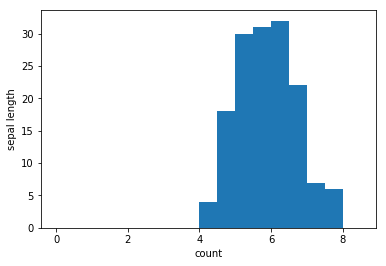

In [5]:
def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal_length'].max() + 1, 0.5)
    fig = plt.hist(df['sepal_length'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')
    
    
histo()
plt.show()

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [4]:
x = df['sepal_length'].values
sum(i for i in x) / len(x)
x_mean = np.mean(x)
x_mean

5.843333333333334

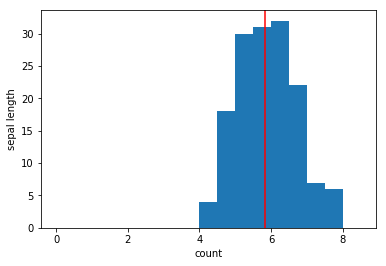

In [5]:
histo()
plt.axvline(x_mean, color='red')
plt.show()

### Sample Variance:

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

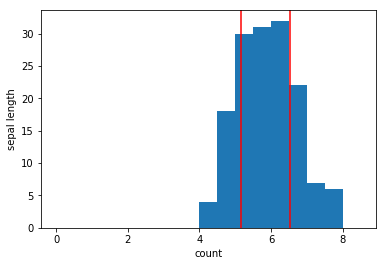

In [6]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)
var = np.var(x, ddof=1)
df['sepal_length'].var()
histo()
plt.axvline(x_mean + var, color='red')
plt.axvline(x_mean - var, color='red')
plt.show()

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [13]:
(sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5
np.sqrt(np.var(x, ddof=1))
std = np.std(x, ddof=1)
df['sepal_length'].std()


0.8280661279778629

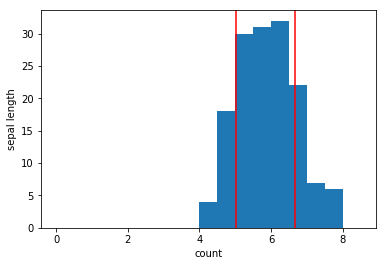

In [14]:
histo()
plt.axvline(x_mean + std, color='red')
plt.axvline(x_mean - std, color='red')
plt.show()

### Min/Max, Mode, Percentile

In [16]:
np.min(x)

4.3

In [17]:
np.max(x)

7.9

In [18]:
## Mode

lst = list(x)
mode = max(set(lst), key=lst.count)
mode

5.0

In [19]:
## 25th and 75th Percentile

y = np.sort(x)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th


5.1

In [20]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

6.4

In [21]:
np.percentile(x, q=[25, 75], interpolation='lower')

array([5.1, 6.4])

In [22]:
df['sepal_length'].quantile(0.25, interpolation='lower')

5.1

In [23]:
df['sepal_length'].quantile(0.75, interpolation='lower')

6.4

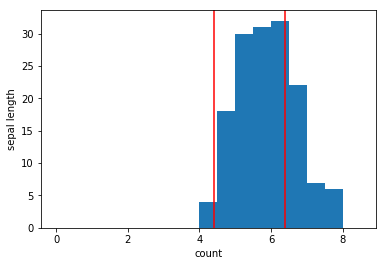

In [28]:
histo()
plt.axvline(percentile_75th, color='red')
plt.axvline(percentile_25th - var, color='red')
plt.show()

In [25]:
## Median (50th Percentile):

x = np.sort(x)

tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

5.8

In [26]:
np.median(x)

5.8

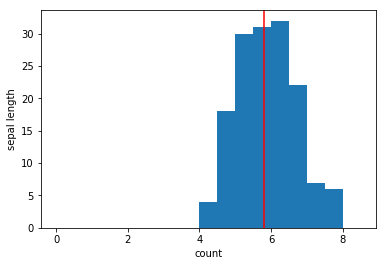

In [29]:
histo()
plt.axvline(median, color='red')
plt.show()

### Exploratory Data Analysis

Lets take another data to explore data furture

In [6]:
# read dataset
df = pd.read_csv('../data/winequality/winequality-red.csv',
                 sep=';')

# How data look like
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


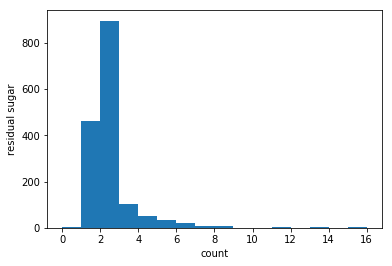

In [8]:
# create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)
fig = plt.hist(df['residual sugar'], bins=bin_edges)

# add plot labels
plt.xlabel('count')
plt.ylabel('residual sugar')
plt.show()

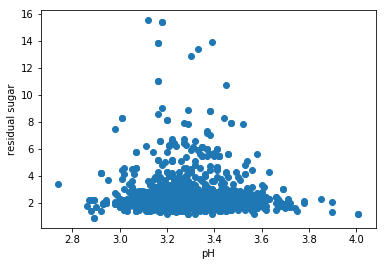

In [9]:
# create scatterplot
fig = plt.scatter(df['pH'], df['residual sugar'])

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

In [37]:
## ScatterPlot Matrix

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


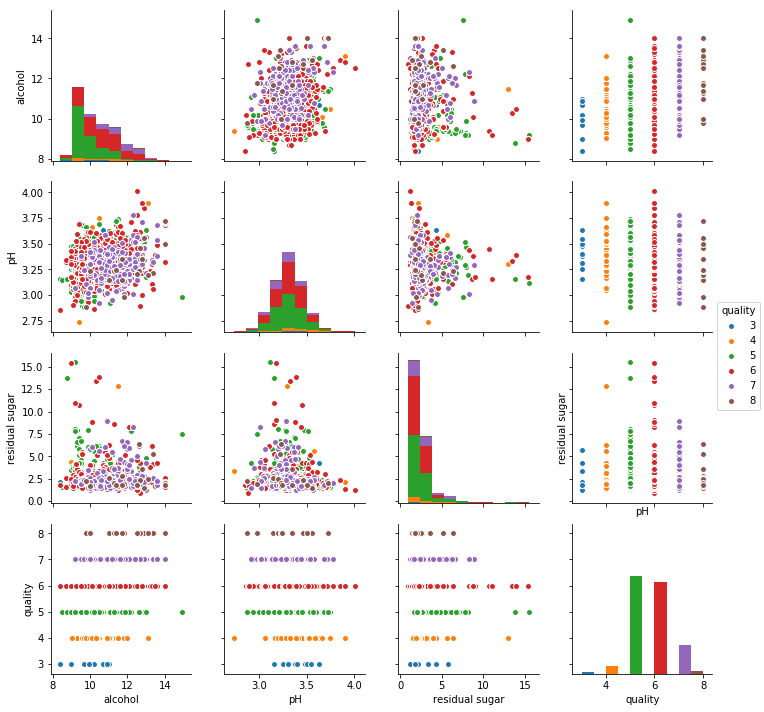

In [7]:
import seaborn.apionly as sns
import warnings
warnings.filterwarnings('ignore')

# create scatterplot matrix
fig = sns.pairplot(data=df[['alcohol', 'pH', 'residual sugar', 'quality']], 
                   hue='quality')

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

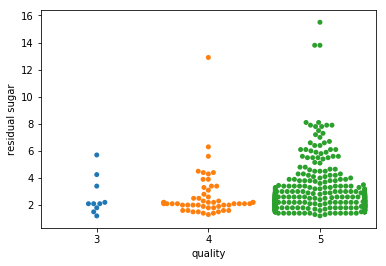

In [41]:
# create bee swarm plot
sns.swarmplot(x='quality', y='residual sugar', 
              data=df[df['quality'] < 6])
plt.show()

## Empirical Cumulative Distribution Function Plots

92.18 percent have 4 or less units residual sugar


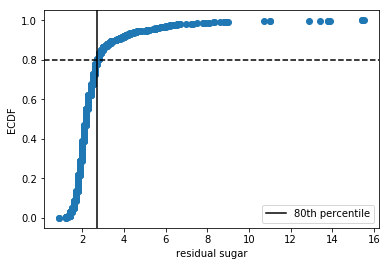

In [42]:
# sort and normalize data
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

# create ecd fplot
plt.plot(x, y, marker='o', linestyle='')


# add plot labels
plt.ylabel('ECDF')
plt.xlabel('residual sugar')

percent_four_or_less = y[x <= 4].max()
print('%.2f percent have 4 or less units residual sugar' % 
      (percent_four_or_less*100))

eightieth_percentile = x[y <= 0.8].max()

plt.axhline(0.8, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='80th percentile')
plt.legend()
plt.show()

## Boxplots

- Distribution of data in terms of median and percentiles (median is the 50th percentile)

In [43]:
percentiles = np.percentile(df['alcohol'], q=[25, 50, 75])
percentiles

array([ 9.5, 10.2, 11.1])

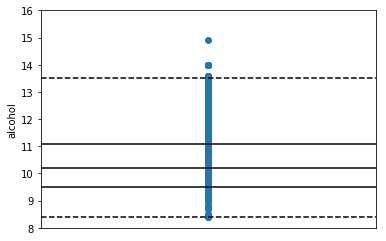

In [44]:
for p in percentiles:
    plt.axhline(p, color='black', linestyle='-')
plt.scatter(np.zeros(df.shape[0]) + 0.5, df['alcohol'])

iqr = percentiles[-1] - percentiles[0]
upper_whisker =  min(df['alcohol'].max(), percentiles[-1] + iqr * 1.5)
lower_whisker = max(df['alcohol'].min(), percentiles[0] - iqr * 1.5)
plt.axhline(upper_whisker, color='black', linestyle='--')
plt.axhline(lower_whisker, color='black', linestyle='--')

plt.ylim([8, 16])
plt.ylabel('alcohol')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

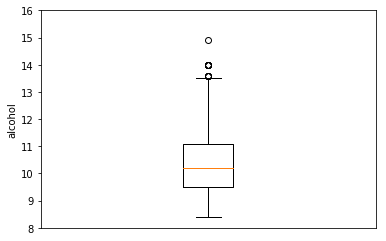

In [45]:
# using matplotlib.pyplot.boxplot:

plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alcohol')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

# Statistics: Statiscal Inference

## Hypothesis Testing

- the task of determining the probability that a hypothesis is true
- typically, we define a null hypothesis and an alternative hypothesis; then, we determine the probability that the null hypothesis is true
- a p-value is a test statistic that can be regarded as evidence against the null hypothesis (for instance, we reject a null hypothesis if the p-value is smaller than a specified threshold or significance level or alpha value) -- the p-value is the probability of a model assuming that the null hypothesis is true
- 1-sample test: compare a sample against a number
- 2-sample test: compare two samples

### Case 1 -- 2-sample test

- null hypothesis: data is identically distributed between the two variables
- how likely is it to observe this data if the null hypothesis is true?
- we can scramble (permute the data) and divide it into 2 new samples and then check if there's any difference (in other words, we generate new data under the null hypothesis)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/iris/iris.csv')
x1 = df.loc[df['species'] == 'setosa', 'sepal_width'].values
x2 = df.loc[df['species'] == 'versicolor', 'sepal_width'].values

In [5]:
for d in (x1, x2):
    print('Mean:', np.mean(d))
    print('Std.Dev.:', np.std(d, ddof=1))

Mean: 3.428
Std.Dev.: 0.3790643690962887
Mean: 2.7700000000000005
Std.Dev.: 0.3137983233784114


- the difference in means (our test statistic) of permuted samples should be zero if the null hypothesis is true

In [6]:
def generate_permutation_samples(sample1, sample2, seed=None):
    rng = np.random.RandomState(seed)
    sample = np.concatenate((sample1, sample2))
    sample_perm = rng.permutation(sample)
    sample1_perm = sample_perm[:sample1.shape[0]]
    sample2_perm = sample_perm[sample1.shape[0]:]
    return sample1_perm, sample2_perm

In [7]:
num_permutations = 1000

perm_mean_diffs = np.zeros(num_permutations)
for i in range(num_permutations):
    x1_perm, x2_perm = generate_permutation_samples(x1, x2, seed=i)
    perm_mean_diffs[i] = np.mean(x1_perm) - np.mean(x2_perm)

In [8]:
empirical_mean_diff = np.mean(x1) - np.mean(x2)
empirical_mean_diff

0.6579999999999995

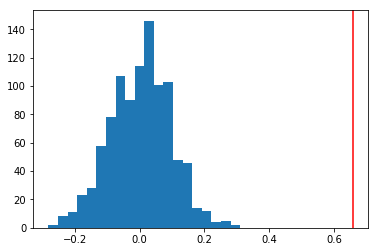

In [10]:
plt.hist(perm_mean_diffs, bins=20)
plt.axvline(empirical_mean_diff, color='red')

In [11]:
p_value = np.sum(perm_mean_diffs >= empirical_mean_diff) / len(perm_mean_diffs)
print('P-value', p_value)

P-value 0.0


- the area under the histogram left (or right) to the vertical bar (difference observed in the original samples) is the p-value
- here, the area right to the vertical bar (i.e., values that are at least as extreme as the observed difference of the mean between the two samples) is 0.0, so we can conclude that the probability of observing this data (the difference between the means of the samples) or something more extreme is 0% likely if the null hypothesis was true (remember that the p-value is not the probability that the null hypothesis is true, though)
- thus, we can reject the null hypothesis (data is "statistically significantly different" from what we would expect to observe if the null hypothesis was true)

### Case 2 -- 1-sample test

In [13]:
df = pd.read_csv('../data/iris/iris.csv')
x1 = df.loc[df['species'] == 'setosa', 'sepal_width'].values
x1_mean = np.mean(x1)
x1_mean

3.428

- our null hypothesis is that two variables, x1 and x2, have the same mean (not necessarily same distribution)
- assume we don't have a sample from x2, but we have its mean
- we set the significance level $\alpha=0.05$

In [14]:
x2_mean = 3.55

In [15]:
# 1) normalize x1 so that it has the same mean as x2
normed_x1 = x1 - np.mean(x1) + x2_mean

# 2) draw bootstrap replicates
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

num_replicates = 1000
bs_replicates = bootstrap_means(x1, n_bootstrap_samples=num_replicates, seed=123)

# 3) compute p-value
p_value = np.sum(bs_replicates >= x2_mean) / num_replicates

print('p-value', p_value)

p-value 0.006


- at $\alpha=0.05$, we can reject the null hypothesis that the two variables are from the same distribtion

# Statistics: Covariance and Correlation

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

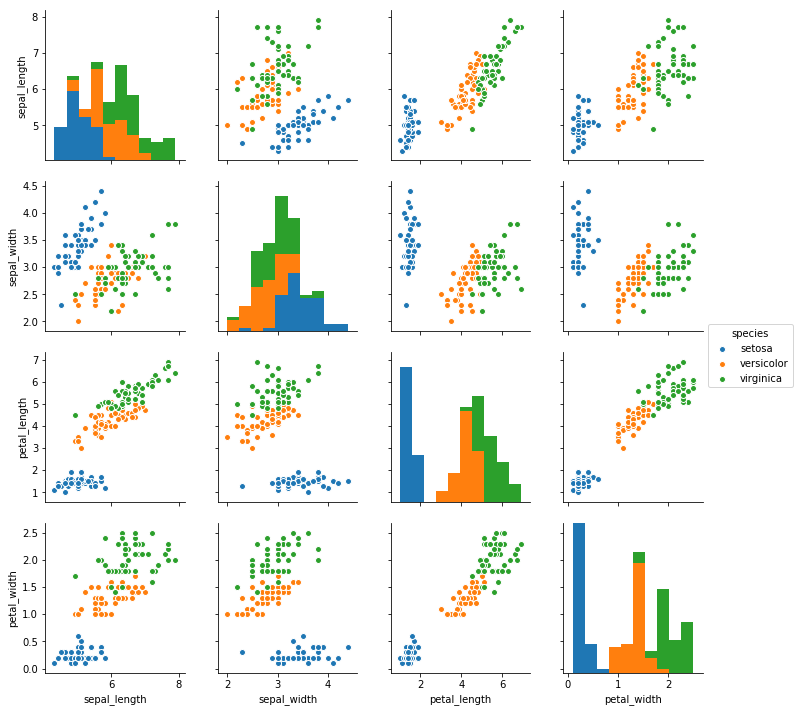

In [18]:
# read dataset
df = pd.read_csv('../data/iris/iris.csv')

# create scatterplot matrix
fig = sns.pairplot(data=df, 
                   hue='species')

plt.show()

In [19]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

## Sample Covariance

- measures how two variables differ from their mean
- positive covariance: that the two variables are both above or both below their respective means
- variables with a positive covariance are positively "correlated" -- they go up or done together
- negative covariance: valuables from one variable tends to be above the mean and the other below their mean
- in other words, negative covariance means that if one variable goes up, the other variable goes down


$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- note that similar to variance, the dimension of the covariance is $unit^2$
- covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

In [20]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2956093959731545

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [21]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## Pearson Correlation Coefficient

- The pearson correlation is "dimensionless" version of the covariance, achieved by dividing by the standard deviation

- Remember, the standard deviation is computed as follows:
        
$$\sigma_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$    

- Pearson correlation:

$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$

$$
= \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$

- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
- $\rho=1$: perfect positive correlation
- $\rho=-1$: perfect negative correlation
- $\rho=0$: no correlation

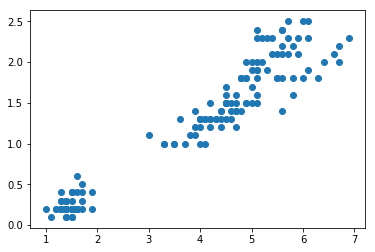

In [22]:
plt.scatter(X[:, 2], X[:, 3])

In [23]:
(np.cov(X[:, 2:4].T)[0, 1] / 
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

0.9628654314027966

In [24]:
(np.cov(X[:, 2:4].T, ddof=0)[0, 1] / 
 (np.std(X[:, 2], ddof=0) * np.std(X[:, 3], ddof=0)))

0.9628654314027966

In [25]:
np.corrcoef(X[:, 2:4].T)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [26]:
stats.pearsonr(X[:, 2], X[:, 3])

(0.9628654314027961, 4.675003907327543e-86)

## What happens, when we scale the variables

In [27]:
standardized = (X - X.mean()) / X.std()

#Pearson unaffected 

np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [28]:
np.corrcoef(standardized.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [29]:
## Covariance affected

np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [30]:
np.cov(standardized.T)

array([[ 0.17599681, -0.01089153,  0.32707828,  0.13251109],
       [-0.01089153,  0.04876198, -0.08461283, -0.03122115],
       [ 0.32707828, -0.08461283,  0.7998544 ,  0.3325438 ],
       [ 0.13251109, -0.03122115,  0.3325438 ,  0.14912676]])

**Correlation** does not imply **Causation**

![Exercise 1](picture/P1.png)

![Exercise 2](picture/P2.png)